# Import the requared libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import model_to_dot
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from statistics import variance
from keras.optimizers import Adam,SGD
import keras.backend as K

# Read the csv file

In [2]:
Apt_dataset=pd.read_csv("Apt_dataset.csv")

## Creating Training and Test Sets for the House dataset

In [3]:
X=Apt_dataset.drop(['List Price', 'Sold Price', 'Days on Market','Sale to List %','price class', 'log price'],axis=1)
Y=Apt_dataset[['Sold Price','log price',"price class"]]

In [4]:
X.shape

(20356, 81)

In [5]:
# Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
def X_norm(df):
    ndf=pd.DataFrame()
    for col in df.columns:
        #norm btw 0 and 1
        ndf[col]=df[col]/max(df[col])
    #Z_score for 'Taxes' and 'Maint. Fees'
    std_scaler = StandardScaler()
    ndf[['Taxes','Maint. Fees']] = std_scaler.fit_transform(ndf[['Taxes','Maint. Fees']].values.tolist())
    return ndf

nX=X_norm(X)
nY=Y.copy(deep=True)
_MAX_Y=max(Y['Sold Price'])
nY['Sold Price']=Y['Sold Price']/_MAX_Y

In [7]:
# Split the dataset to test & train

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(nX, nY, test_size=0.15,stratify=nY[["price class"]])

In [9]:
## Evaluation Methods

In [10]:
def error_summary(y_true, y_pred):
    MAPE=np.average(np.abs(y_true - y_pred) / y_true, axis=0)*100
    RMSE=np.sqrt(mean_squared_error(y_true, y_pred))
    R2=r2_score(y_true, y_pred)
    APE=np.abs(y_true - y_pred) / y_true
    acc=sum(APE<0.2)/len(APE)
    dict_error={'Value':[R2,_MAX_Y*RMSE,MAPE,acc]}
    index_error=['R2','RMSE','MAPE',"ACC(APE<20%)"]
    df = pd.DataFrame(dict_error,index=index_error)
    return round(df,2).T

def APE_hist(title,y_true, y_pred):
    APE=(np.abs(y_true - y_pred) / y_true)
    plt.hist(100*APE,bins=range(100),density=True,cumulative=True)
    plt.title(title)
    plt.xlabel('APE')
    plt.ylabel('cumulative distribution')
    
def customLoss(y, y_pred):
    MAPE=K.mean(K.abs(y-y_pred) / y,axis=0)
    return MAPE

def Log_customLoss(y, y_pred):
    MAPE=K.mean(K.abs(K.exp(y_pred)-K.exp(y))/K.exp(y),axis=0)
    return MAPE


In [11]:
def get_model(L,F,opt="adam",loss="mse"):
    
    model = Sequential()
    for n,f in zip(L,F):
        model.add(Dense(n, activation = f))
        
    model.compile(
        loss=loss,                                 
        optimizer=opt                            
    )
    
    return model

In [12]:
# model with one layer relu like a (traditional linear regression) sgd regressor

In [13]:
model1= get_model([1],["relu"],opt=SGD(lr=0.0002),loss=customLoss)
history1 = model1.fit(
    X_train,Y_train['Sold Price'],
    validation_data = (X_test, Y_test['Sold Price']),
    epochs = 400,
)

Epoch 1/400
541/541 [==============================] - 1s 1ms/step - loss: 0.8070 - val_loss: 0.7664
Epoch 2/400
541/541 [==============================] - 0s 459us/step - loss: 0.7702 - val_loss: 0.7298
Epoch 3/400
541/541 [==============================] - 0s 464us/step - loss: 0.7301 - val_loss: 0.6970
Epoch 4/400
541/541 [==============================] - 0s 482us/step - loss: 0.6943 - val_loss: 0.6659
Epoch 5/400
541/541 [==============================] - 0s 463us/step - loss: 0.6603 - val_loss: 0.6346
Epoch 6/400
541/541 [==============================] - 0s 457us/step - loss: 0.6302 - val_loss: 0.6037
Epoch 7/400
541/541 [==============================] - 0s 458us/step - loss: 0.5926 - val_loss: 0.5732
Epoch 8/400
541/541 [==============================] - 0s 432us/step - loss: 0.5641 - val_loss: 0.5420
Epoch 9/400
541/541 [==============================] - 0s 435us/step - loss: 0.5275 - val_loss: 0.5107
Epoch 10/400
541/541 [==============================] - 0s 427us/step - los

Epoch 80/400
541/541 [==============================] - 0s 420us/step - loss: 0.1034 - val_loss: 0.1010
Epoch 81/400
541/541 [==============================] - 0s 416us/step - loss: 0.1027 - val_loss: 0.1003
Epoch 82/400
541/541 [==============================] - 0s 419us/step - loss: 0.1010 - val_loss: 0.1005
Epoch 83/400
541/541 [==============================] - 0s 429us/step - loss: 0.1032 - val_loss: 0.1001
Epoch 84/400
541/541 [==============================] - 0s 423us/step - loss: 0.1026 - val_loss: 0.1006
Epoch 85/400
541/541 [==============================] - 0s 418us/step - loss: 0.1017 - val_loss: 0.1000
Epoch 86/400
541/541 [==============================] - 0s 422us/step - loss: 0.1019 - val_loss: 0.1005
Epoch 87/400
541/541 [==============================] - 0s 444us/step - loss: 0.1021 - val_loss: 0.0996
Epoch 88/400
541/541 [==============================] - 0s 424us/step - loss: 0.1005 - val_loss: 0.0998
Epoch 89/400
541/541 [==============================] - 0s 413us

541/541 [==============================] - 0s 449us/step - loss: 0.0979 - val_loss: 0.0965
Epoch 159/400
541/541 [==============================] - 0s 453us/step - loss: 0.0981 - val_loss: 0.0962
Epoch 160/400
541/541 [==============================] - 0s 430us/step - loss: 0.0988 - val_loss: 0.0962
Epoch 161/400
541/541 [==============================] - 0s 437us/step - loss: 0.0987 - val_loss: 0.0965
Epoch 162/400
541/541 [==============================] - 0s 445us/step - loss: 0.0982 - val_loss: 0.0962
Epoch 163/400
541/541 [==============================] - 0s 427us/step - loss: 0.0987 - val_loss: 0.0963
Epoch 164/400
541/541 [==============================] - 0s 449us/step - loss: 0.0974 - val_loss: 0.0960
Epoch 165/400
541/541 [==============================] - 0s 444us/step - loss: 0.0982 - val_loss: 0.0963
Epoch 166/400
541/541 [==============================] - 0s 439us/step - loss: 0.0997 - val_loss: 0.0961
Epoch 167/400
541/541 [==============================] - 0s 445us/ste

541/541 [==============================] - 0s 478us/step - loss: 0.0984 - val_loss: 0.0960
Epoch 237/400
541/541 [==============================] - 0s 474us/step - loss: 0.0982 - val_loss: 0.0963
Epoch 238/400
541/541 [==============================] - 0s 469us/step - loss: 0.0974 - val_loss: 0.0964
Epoch 239/400
541/541 [==============================] - 0s 475us/step - loss: 0.0986 - val_loss: 0.0963
Epoch 240/400
541/541 [==============================] - 0s 460us/step - loss: 0.0983 - val_loss: 0.0963
Epoch 241/400
541/541 [==============================] - 0s 481us/step - loss: 0.0980 - val_loss: 0.0968
Epoch 242/400
541/541 [==============================] - 0s 473us/step - loss: 0.0999 - val_loss: 0.0973
Epoch 243/400
541/541 [==============================] - 0s 464us/step - loss: 0.0988 - val_loss: 0.0965
Epoch 244/400
541/541 [==============================] - 0s 480us/step - loss: 0.0987 - val_loss: 0.0965
Epoch 245/400
541/541 [==============================] - 0s 469us/ste

541/541 [==============================] - 0s 429us/step - loss: 0.0984 - val_loss: 0.0959
Epoch 315/400
541/541 [==============================] - 0s 418us/step - loss: 0.0973 - val_loss: 0.0959
Epoch 316/400
541/541 [==============================] - 0s 422us/step - loss: 0.0983 - val_loss: 0.0971
Epoch 317/400
541/541 [==============================] - 0s 423us/step - loss: 0.0980 - val_loss: 0.0962
Epoch 318/400
541/541 [==============================] - 0s 424us/step - loss: 0.0978 - val_loss: 0.0962
Epoch 319/400
541/541 [==============================] - 0s 416us/step - loss: 0.0988 - val_loss: 0.0960
Epoch 320/400
541/541 [==============================] - 0s 410us/step - loss: 0.0968 - val_loss: 0.0962
Epoch 321/400
541/541 [==============================] - 0s 420us/step - loss: 0.0982 - val_loss: 0.0964
Epoch 322/400
541/541 [==============================] - 0s 423us/step - loss: 0.0969 - val_loss: 0.0967
Epoch 323/400
541/541 [==============================] - 0s 420us/ste

541/541 [==============================] - 0s 426us/step - loss: 0.0984 - val_loss: 0.0960
Epoch 393/400
541/541 [==============================] - 0s 418us/step - loss: 0.0981 - val_loss: 0.0958
Epoch 394/400
541/541 [==============================] - 0s 413us/step - loss: 0.0974 - val_loss: 0.0963
Epoch 395/400
541/541 [==============================] - 0s 411us/step - loss: 0.0987 - val_loss: 0.0963
Epoch 396/400
541/541 [==============================] - 0s 411us/step - loss: 0.0988 - val_loss: 0.0962
Epoch 397/400
541/541 [==============================] - 0s 410us/step - loss: 0.0978 - val_loss: 0.0964
Epoch 398/400
541/541 [==============================] - 0s 412us/step - loss: 0.0980 - val_loss: 0.0964
Epoch 399/400
541/541 [==============================] - 0s 418us/step - loss: 0.0977 - val_loss: 0.0960
Epoch 400/400
541/541 [==============================] - 0s 456us/step - loss: 0.0989 - val_loss: 0.0965


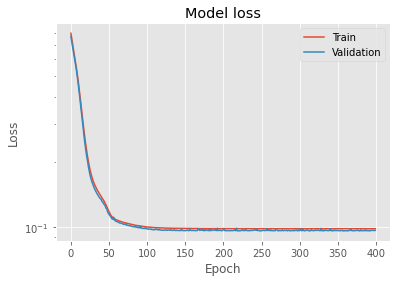

In [14]:
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.yscale('log',base=10)
plt.show()

In [15]:
y_pred1=(model1.predict(X_test)).reshape(-1)
error_summary(Y_test['Sold Price'], y_pred1)

,R2,RMSE,MAPE,ACC(APE<20%)
Value,0.85,75613.25,9.65,0.89


In [16]:
#log

In [17]:
model2= get_model([10,1],['linear','relu'],opt=SGD(lr=0.001))
history2 = model2.fit(
    X_train,Y_train['Sold Price'],
    validation_data = (X_test, Y_test['Sold Price']),
    epochs = 1000,
)

Epoch 1/1000
541/541 [==============================] - 0s 584us/step - loss: 0.2652 - val_loss: 0.1116
Epoch 2/1000
541/541 [==============================] - 0s 454us/step - loss: 0.1090 - val_loss: 0.1035
Epoch 3/1000
541/541 [==============================] - 0s 444us/step - loss: 0.1015 - val_loss: 0.0919
Epoch 4/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0881 - val_loss: 0.0768
Epoch 5/1000
541/541 [==============================] - 0s 458us/step - loss: 0.0725 - val_loss: 0.0623
Epoch 6/1000
541/541 [==============================] - 0s 448us/step - loss: 0.0581 - val_loss: 0.0503
Epoch 7/1000
541/541 [==============================] - 0s 451us/step - loss: 0.0464 - val_loss: 0.0398
Epoch 8/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0365 - val_loss: 0.0313
Epoch 9/1000
541/541 [==============================] - 0s 455us/step - loss: 0.0294 - val_loss: 0.0247
Epoch 10/1000
541/541 [==============================] - 0s 461u

541/541 [==============================] - 0s 461us/step - loss: 0.0035 - val_loss: 0.0032
Epoch 80/1000
541/541 [==============================] - 0s 480us/step - loss: 0.0036 - val_loss: 0.0032
Epoch 81/1000
541/541 [==============================] - 0s 487us/step - loss: 0.0035 - val_loss: 0.0032
Epoch 82/1000
541/541 [==============================] - 0s 555us/step - loss: 0.0036 - val_loss: 0.0032
Epoch 83/1000
541/541 [==============================] - 0s 448us/step - loss: 0.0035 - val_loss: 0.0032
Epoch 84/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0035 - val_loss: 0.0032
Epoch 85/1000
541/541 [==============================] - 0s 473us/step - loss: 0.0035 - val_loss: 0.0032
Epoch 86/1000
541/541 [==============================] - 0s 475us/step - loss: 0.0036 - val_loss: 0.0031
Epoch 87/1000
541/541 [==============================] - 0s 458us/step - loss: 0.0035 - val_loss: 0.0031
Epoch 88/1000
541/541 [==============================] - 0s 452us/ste

541/541 [==============================] - 0s 474us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 157/1000
541/541 [==============================] - 0s 479us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 158/1000
541/541 [==============================] - 0s 451us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 159/1000
541/541 [==============================] - 0s 455us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 160/1000
541/541 [==============================] - 0s 452us/step - loss: 0.0031 - val_loss: 0.0027
Epoch 161/1000
541/541 [==============================] - 0s 456us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 162/1000
541/541 [==============================] - 0s 463us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 163/1000
541/541 [==============================] - 0s 463us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 164/1000
541/541 [==============================] - 0s 468us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 165/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 440us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 234/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 235/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 236/1000
541/541 [==============================] - 0s 448us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 237/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 238/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 239/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 240/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 241/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0029 - val_loss: 0.0025
Epoch 242/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 448us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 311/1000
541/541 [==============================] - 0s 453us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 312/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 313/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0029 - val_loss: 0.0024
Epoch 314/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 315/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 316/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0028 - val_loss: 0.0024
Epoch 317/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 318/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 319/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 430us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 388/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 389/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 390/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 391/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 392/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 393/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 394/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 395/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 396/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 469us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 465/1000
541/541 [==============================] - 0s 467us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 466/1000
541/541 [==============================] - 0s 456us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 467/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 468/1000
541/541 [==============================] - 0s 464us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 469/1000
541/541 [==============================] - 0s 469us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 470/1000
541/541 [==============================] - 0s 472us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 471/1000
541/541 [==============================] - 0s 458us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 472/1000
541/541 [==============================] - 0s 445us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 473/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 450us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 542/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 543/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 544/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 545/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 546/1000
541/541 [==============================] - 0s 450us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 547/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 548/1000
541/541 [==============================] - 0s 450us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 549/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 550/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 442us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 619/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 620/1000
541/541 [==============================] - 0s 452us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 621/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 622/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 623/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 624/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 625/1000
541/541 [==============================] - 0s 429us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 626/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 627/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 428us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 696/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 697/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 698/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 699/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 700/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 701/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 702/1000
541/541 [==============================] - 0s 430us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 703/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 704/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 429us/step - loss: 0.0023 - val_loss: 0.0023
Epoch 773/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 774/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 775/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 776/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 777/1000
541/541 [==============================] - 0s 430us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 778/1000
541/541 [==============================] - 0s 429us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 779/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0025 - val_loss: 0.0023
Epoch 780/1000
541/541 [==============================] - 0s 429us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 781/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 434us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 850/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 851/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 852/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 853/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 854/1000
541/541 [==============================] - 0s 429us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 855/1000
541/541 [==============================] - 0s 430us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 856/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 857/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 858/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 445us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 927/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 928/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 929/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 930/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 931/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 932/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 933/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 934/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 935/1000
541/541 [==============================] - 0s 

In [18]:
y_pred2=(model2.predict(X_test)).reshape(-1)
error_summary(Y_test['Sold Price'], y_pred2)

,R2,RMSE,MAPE,ACC(APE<20%)
Value,0.87,71641.27,10.68,0.88


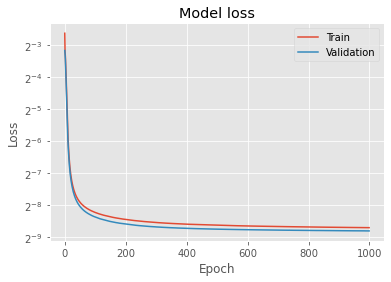

In [19]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.yscale('log',base=2)
plt.show()

In [20]:
model3= get_model([10,1],['tanh','relu'],opt=SGD(lr=0.001))
history3 = model3.fit(
    X_train,Y_train['Sold Price'],
    validation_data = (X_test, Y_test['Sold Price']),
    epochs = 1000,
)

Epoch 1/1000
541/541 [==============================] - 0s 571us/step - loss: 0.1148 - val_loss: 0.0937
Epoch 2/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0914 - val_loss: 0.0852
Epoch 3/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0830 - val_loss: 0.0780
Epoch 4/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0765 - val_loss: 0.0717
Epoch 5/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0704 - val_loss: 0.0659
Epoch 6/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0653 - val_loss: 0.0604
Epoch 7/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0602 - val_loss: 0.0554
Epoch 8/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0546 - val_loss: 0.0505
Epoch 9/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0496 - val_loss: 0.0459
Epoch 10/1000
541/541 [==============================] - 0s 432u

541/541 [==============================] - 0s 434us/step - loss: 0.0055 - val_loss: 0.0053
Epoch 80/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0055 - val_loss: 0.0053
Epoch 81/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0054 - val_loss: 0.0053
Epoch 82/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0052 - val_loss: 0.0052
Epoch 83/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0052 - val_loss: 0.0052
Epoch 84/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0051 - val_loss: 0.0051
Epoch 85/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0051 - val_loss: 0.0051
Epoch 86/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0052 - val_loss: 0.0051
Epoch 87/1000
541/541 [==============================] - 0s 430us/step - loss: 0.0050 - val_loss: 0.0050
Epoch 88/1000
541/541 [==============================] - 0s 432us/ste

541/541 [==============================] - 0s 431us/step - loss: 0.0038 - val_loss: 0.0037
Epoch 157/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0038 - val_loss: 0.0037
Epoch 158/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0037 - val_loss: 0.0037
Epoch 159/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0038 - val_loss: 0.0037
Epoch 160/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0037 - val_loss: 0.0037
Epoch 161/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0037 - val_loss: 0.0037
Epoch 162/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0037 - val_loss: 0.0037
Epoch 163/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0038 - val_loss: 0.0037
Epoch 164/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0035 - val_loss: 0.0037
Epoch 165/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 434us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 234/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 235/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 236/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 237/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 238/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 239/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 240/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 241/1000
541/541 [==============================] - 0s 430us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 242/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 437us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 311/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 312/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 313/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 314/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 315/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 316/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 317/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 318/1000
541/541 [==============================] - 0s 445us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 319/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 433us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 388/1000
541/541 [==============================] - 0s 429us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 389/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 390/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 391/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 392/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 393/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 394/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 395/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 396/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 438us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 465/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 466/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 467/1000
541/541 [==============================] - 0s 429us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 468/1000
541/541 [==============================] - 0s 430us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 469/1000
541/541 [==============================] - 0s 429us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 470/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 471/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 472/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 473/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 435us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 542/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 543/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 544/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 545/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 546/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 547/1000
541/541 [==============================] - 0s 430us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 548/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 549/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 550/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 431us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 619/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 620/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 621/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 622/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 623/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 624/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 625/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 626/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 627/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 444us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 696/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 697/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 698/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 699/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 700/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 701/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 702/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 703/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 704/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 434us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 773/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 774/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 775/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 776/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 777/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 778/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 779/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 780/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 781/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 448us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 850/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 851/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 852/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 853/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 854/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 855/1000
541/541 [==============================] - 0s 445us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 856/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 857/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 858/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 445us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 927/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 928/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 929/1000
541/541 [==============================] - 0s 445us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 930/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 931/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 932/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 933/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 934/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 935/1000
541/541 [==============================] - 0s 

In [21]:
y_pred3=(model3.predict(X_test)).reshape(-1)
error_summary(Y_test['Sold Price'], y_pred3)

,R2,RMSE,MAPE,ACC(APE<20%)
Value,0.86,73585.54,11.21,0.86


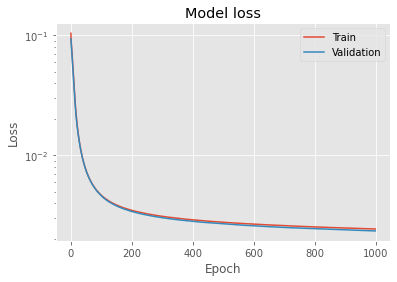

In [22]:
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.yscale('log',base=10)
plt.show()

In [23]:
model4= get_model([10,1],['sigmoid','relu'],opt=SGD(lr=0.001))
history4 = model4.fit(
    X_train,Y_train['Sold Price'],
    validation_data = (X_test, Y_test['Sold Price']),
    epochs = 1000,
)

Epoch 1/1000
541/541 [==============================] - 0s 598us/step - loss: 0.0525 - val_loss: 0.0275
Epoch 2/1000
541/541 [==============================] - 0s 452us/step - loss: 0.0270 - val_loss: 0.0246
Epoch 3/1000
541/541 [==============================] - 0s 445us/step - loss: 0.0247 - val_loss: 0.0223
Epoch 4/1000
541/541 [==============================] - 0s 454us/step - loss: 0.0221 - val_loss: 0.0204
Epoch 5/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0202 - val_loss: 0.0188
Epoch 6/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0186 - val_loss: 0.0175
Epoch 7/1000
541/541 [==============================] - 0s 453us/step - loss: 0.0177 - val_loss: 0.0164
Epoch 8/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0166 - val_loss: 0.0154
Epoch 9/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0153 - val_loss: 0.0145
Epoch 10/1000
541/541 [==============================] - 0s 447u

541/541 [==============================] - 0s 450us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 80/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 81/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 82/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0049 - val_loss: 0.0048
Epoch 83/1000
541/541 [==============================] - 0s 454us/step - loss: 0.0049 - val_loss: 0.0047
Epoch 84/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 85/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 86/1000
541/541 [==============================] - 0s 451us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 87/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0049 - val_loss: 0.0046
Epoch 88/1000
541/541 [==============================] - 0s 453us/ste

541/541 [==============================] - 0s 437us/step - loss: 0.0040 - val_loss: 0.0036
Epoch 157/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0039 - val_loss: 0.0036
Epoch 158/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0039 - val_loss: 0.0036
Epoch 159/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0038 - val_loss: 0.0036
Epoch 160/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0038 - val_loss: 0.0036
Epoch 161/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0039 - val_loss: 0.0036
Epoch 162/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0039 - val_loss: 0.0036
Epoch 163/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0038 - val_loss: 0.0035
Epoch 164/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0038 - val_loss: 0.0035
Epoch 165/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 446us/step - loss: 0.0034 - val_loss: 0.0031
Epoch 234/1000
541/541 [==============================] - 0s 450us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 235/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0034 - val_loss: 0.0031
Epoch 236/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0035 - val_loss: 0.0031
Epoch 237/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0034 - val_loss: 0.0031
Epoch 238/1000
541/541 [==============================] - 0s 451us/step - loss: 0.0036 - val_loss: 0.0031
Epoch 239/1000
541/541 [==============================] - 0s 444us/step - loss: 0.0035 - val_loss: 0.0031
Epoch 240/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0034 - val_loss: 0.0031
Epoch 241/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0036 - val_loss: 0.0031
Epoch 242/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 449us/step - loss: 0.0032 - val_loss: 0.0029
Epoch 311/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 312/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 313/1000
541/541 [==============================] - 0s 451us/step - loss: 0.0032 - val_loss: 0.0029
Epoch 314/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 315/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0032 - val_loss: 0.0029
Epoch 316/1000
541/541 [==============================] - 0s 461us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 317/1000
541/541 [==============================] - 0s 453us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 318/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 319/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 436us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 388/1000
541/541 [==============================] - 0s 446us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 389/1000
541/541 [==============================] - 0s 458us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 390/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 391/1000
541/541 [==============================] - 0s 453us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 392/1000
541/541 [==============================] - 0s 442us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 393/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 394/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 395/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 396/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 447us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 465/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 466/1000
541/541 [==============================] - 0s 449us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 467/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 468/1000
541/541 [==============================] - 0s 443us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 469/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 470/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 471/1000
541/541 [==============================] - 0s 448us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 472/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 473/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 435us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 542/1000
541/541 [==============================] - 0s 432us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 543/1000
541/541 [==============================] - 0s 431us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 544/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 545/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 546/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 547/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 548/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 549/1000
541/541 [==============================] - 0s 447us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 550/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 436us/step - loss: 0.0029 - val_loss: 0.0025
Epoch 619/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 620/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 621/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 622/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 623/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 624/1000
541/541 [==============================] - 0s 433us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 625/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0030 - val_loss: 0.0025
Epoch 626/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 627/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 436us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 696/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 697/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 698/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 699/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 700/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 701/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 702/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 703/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 704/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 436us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 773/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 774/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 775/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 776/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 777/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 778/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 779/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 780/1000
541/541 [==============================] - 0s 441us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 781/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 437us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 850/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 851/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 852/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 853/1000
541/541 [==============================] - 0s 440us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 854/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 855/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 856/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 857/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 858/1000
541/541 [==============================] - 0s 

541/541 [==============================] - 0s 438us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 927/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 928/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 929/1000
541/541 [==============================] - 0s 434us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 930/1000
541/541 [==============================] - 0s 435us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 931/1000
541/541 [==============================] - 0s 437us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 932/1000
541/541 [==============================] - 0s 439us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 933/1000
541/541 [==============================] - 0s 438us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 934/1000
541/541 [==============================] - 0s 436us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 935/1000
541/541 [==============================] - 0s 

In [24]:
# Expected Value with ML

In [25]:
len(set(Y_train['price class']))

28

In [26]:
model1_class= get_model([27],["softmax"],opt=SGD(lr=0.001),loss= "SparseCategoricalCrossentropy")
history1_class = model1_class.fit(
    X_train,Y_train['price class'],
    validation_data = (X_test, Y_test['price class']),
    epochs = 400,
)

Epoch 1/400
  1/541 [..............................] - ETA: 1:06 - loss: 3.3643

InvalidArgumentError:  Received a label value of 27 which is outside the valid range of [0, 27).  Label values: 5 6 6 6 4 7 9 4 10 13 6 8 6 12 8 7 9 7 9 5 8 5 6 27 10 6 5 22 2 5 4 13
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-26-6fef4f4f8112>:2) ]] [Op:__inference_train_function_2196030]

Function call stack:
train_function


In [ ]:
# Plot training & validation loss values
plt.plot(history1_log.history['loss'])
plt.plot(history1_log.history['val_loss'])
plt.title('Model MAPE')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.yscale('log',base=10)
plt.show()